# Finding Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### ====================================================================

# 1. Visualize

### a. BoxPlot

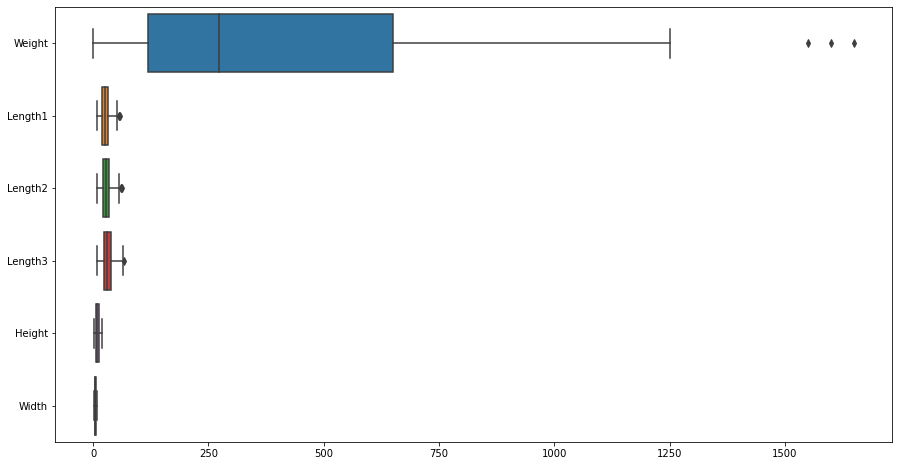

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,orient='h')
plt.show()

## b. Histogram

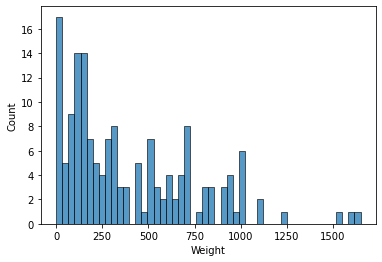

In [5]:
sns.histplot(data['Weight'],bins=50)
plt.show()

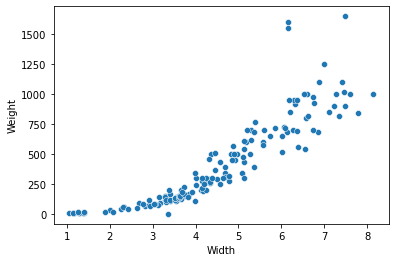

In [6]:
sns.scatterplot(x='Width',y='Weight',data=data)
plt.show()

We can see from the above plots that there are 3 Outliers

### ======================================================================

# 2. Z-Score

In [7]:
outlier = []

def outlier_detector(Data):
    threshold = 3
    mean = np.mean(Data)
    std = np.std(Data)
    
    for i in Data:
        z_score = (i-mean)/std
        
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [8]:
outlier_detector(data.Weight)

[1600.0, 1550.0, 1650.0]

In [9]:
data[data['Weight'] >= 1550]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


### ======================================================================

# 3. Percentile

In [10]:
min_val, max_val = data['Weight'].quantile([0.001,0.999])
print(min_val)
print(max_val)

0.9322
1642.1000000000006


In [11]:
outlier = data[(data['Weight'] < min_val) | (data['Weight'] > max_val)]
outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


### =====================================================================

# 4. Interquartile Range(IQR)

In [12]:
Q1 = data['Weight'].quantile(0.25)
Q3 = data['Weight'].quantile(0.75)

IQR = Q3-Q1
IQR

530.0

In [13]:
data_iqr = data[(data['Weight'] < (Q1 - 1.5*IQR)) | (data['Weight'] > (Q3 + 1.5*IQR))]
data_iqr

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


# ================================================